## Sentiment Analysis Using Doc2Vec with 2 layer Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
train = pd.read_csv('labeledTrainData.tsv',quoting=3,header=0,delimiter='\t')
test = pd.read_csv('testData.tsv',quoting=3,header=0,delimiter='\t')
all_data = pd.read_csv('unlabeledTrainData.tsv',quoting=3,header=0,delimiter='\t')

In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
train.review[0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [5]:
def clean_review(movie_review):
    #Remove HTML tags
    review = BeautifulSoup(movie_review,"lxml").get_text()
    
    #Remove non-alphabets
    review = re.sub("[^a-zA-Z]"," ",review)
    return review.lower()

In [6]:
trainReview = [clean_review(review) for review in train.review]
testReview = [clean_review(review) for review in test.review]
all_dataReview = [clean_review(review) for review in all_data.review]

In [7]:
from gensim.models.doc2vec import LabeledSentence
from nltk import wordpunct_tokenize

trainLabels = []
testLabels = []
all_dataLabels = []

for i in xrange(len(trainReview)):
    trainLabels.append(LabeledSentence(words=wordpunct_tokenize(trainReview[i]),tags=[train.id[i]]))
    
for i in xrange(len(all_dataReview)):
    all_dataLabels.append(LabeledSentence(words=wordpunct_tokenize(all_dataReview[i]),tags=[all_data.id[i]]))
    
for i in xrange(len(testReview)):
    testLabels.append(LabeledSentence(words=wordpunct_tokenize(testReview[i]),tags=[test.id[i]])) 

In [8]:
del trainReview
del testReview
del all_dataReview

In [9]:
from gensim.models import Doc2Vec
vocab = trainLabels + testLabels + all_dataLabels

vectorizer = Doc2Vec(size=100, window=6, min_count=10)
vectorizer.build_vocab(vocab)

In [ ]:
for i in range(5):
    vectorizer.train(vocab)

In [ ]:
vectorizer.save('doc2vec.d2v')

In [10]:
vectorizer = Doc2Vec.load('doc2vec.d2v')

In [11]:
X_train = [vectorizer.docvecs[i] for i in train.id]
X_test = [vectorizer.docvecs[i] for i in test.id]

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = train.sentiment.values

In [13]:
from sklearn.cross_validation import train_test_split
X1,X2,y1,y2 = train_test_split(X_train,y_train,test_size=0.3)

In [14]:
from models import MLP
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [15]:
input_size=100
hiddenSize1=60
hiddenSize2 = 30
output_size=2
model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='relu')

In [16]:
model.train(X1,y1,X_val=X2,y_val=y2,n_iters=10000,learning_rate=4e-3,opt='momentum')

Iteration 0, loss = 1.710940
Validation Accuracy :0.501333
Iteration 500, loss = 0.483112
Validation Accuracy :0.791733
Iteration 1000, loss = 0.335114
Validation Accuracy :0.827867
Iteration 1500, loss = 0.332746
Validation Accuracy :0.841600
Iteration 2000, loss = 0.360641
Validation Accuracy :0.844267
Iteration 2500, loss = 0.329794
Validation Accuracy :0.845333
Iteration 3000, loss = 0.281117
Validation Accuracy :0.841600
Iteration 3500, loss = 0.326737
Validation Accuracy :0.847467
Iteration 4000, loss = 0.377320
Validation Accuracy :0.847067
Iteration 4500, loss = 0.375574
Validation Accuracy :0.845333
Iteration 5000, loss = 0.344434
Validation Accuracy :0.847200
Iteration 5500, loss = 0.390534
Validation Accuracy :0.848000
Iteration 6000, loss = 0.423900
Validation Accuracy :0.845867
Iteration 6500, loss = 0.278397
Validation Accuracy :0.846800
Iteration 7000, loss = 0.271041
Validation Accuracy :0.846400
Iteration 7500, loss = 0.374585
Validation Accuracy :0.847467
Iteration 80

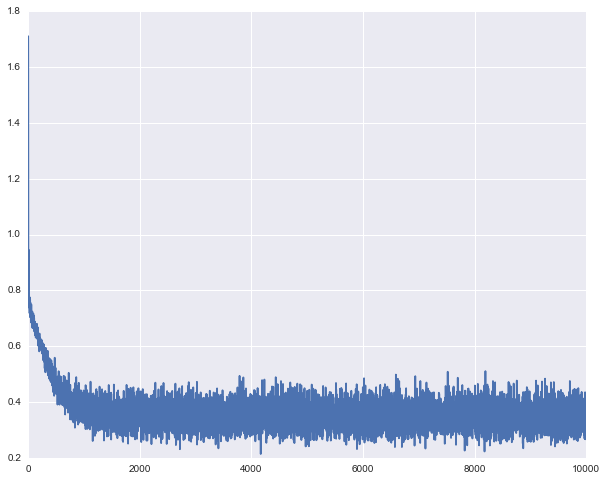

In [17]:
plt.plot(model.loss_history)